In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
#k = 3
#here y is not needed so we are going to ignoring it.
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

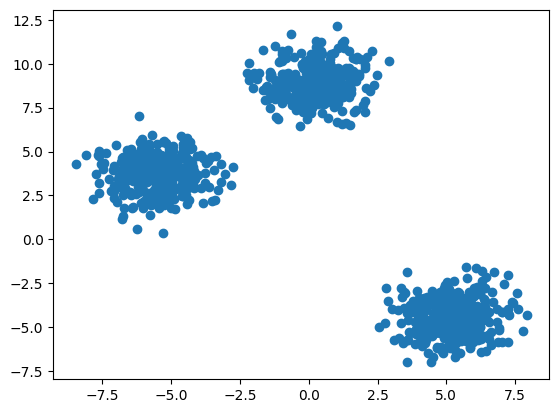

In [4]:
plt.scatter(X[:,0] , X[:,1])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
##Manual process
#Elbow method to select the k value

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [9]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1181.4952002962868,
 1036.0284039036292,
 857.2751150832092,
 767.9899447322797,
 666.2104104313646,
 591.5706803311326,
 559.0543721014063]

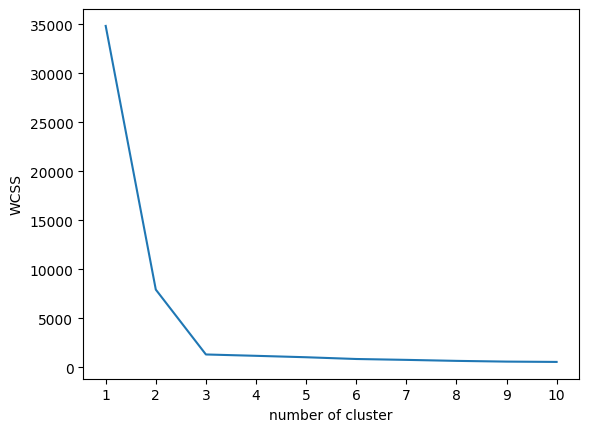

In [10]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [20]:
y_labels = kmeans.fit_predict(X_train)

In [21]:
from matplotlib.colors import ListedColormap

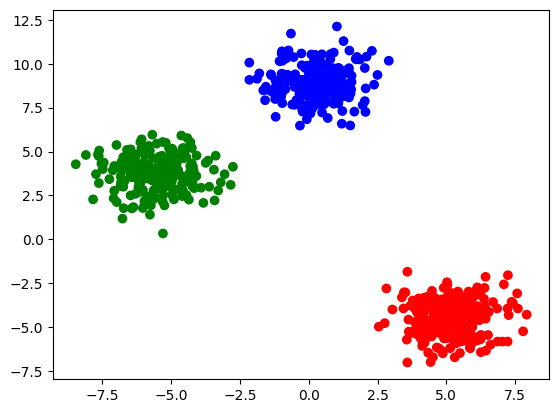

In [22]:
colors = ListedColormap(['red', 'blue', 'green'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels, cmap=colors)
plt.show()

In [24]:
y_test_label=kmeans.predict(X_test)

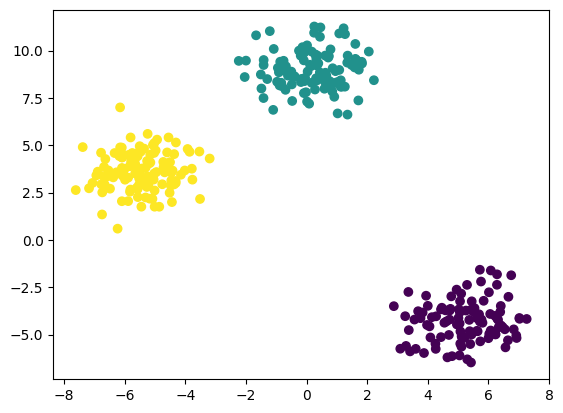

In [25]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_label)

Knee Locator-Find k directly

In [27]:
from kneed import KneeLocator

In [29]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [30]:
kl.elbow

np.int64(3)

In [35]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [34]:
# Create an empty array for corrected labels
labels_corrected = np.zeros_like(y_labels)

In [36]:
for i in range(3):
  mask = (y_labels == i)
  labels_corrected[mask] = mode(y_train[mask], keepdims=True)[0]

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_train, labels_corrected)
print("Clustering Accuracy:", accuracy)

Clustering Accuracy: 1.0
